## Policy Analysis Findings

### Part 1: Trends for HDB Prices in Yishun

In [1]:
# Import libraries 

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data

price1999 = pd.read_csv('resale-flat-prices-based-on-approval-date-1990-1999.csv')
price2012 = pd.read_csv('resale-flat-prices-based-on-approval-date-2000-feb-2012.csv')
price2014 = pd.read_csv('resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv')
price2016 = pd.read_csv('resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv')
price2017 = pd.read_csv('resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv')

df = pd.concat([price1999, price2012, price2014], sort=False)
df = pd.concat([df, price2016, price2017], axis=0, ignore_index=True, sort=False)

df['month'] = pd.to_datetime(df['month']) # to datetime

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893168 entries, 0 to 893167
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   month                893168 non-null  datetime64[ns]
 1   town                 893168 non-null  object        
 2   flat_type            893168 non-null  object        
 3   block                893168 non-null  object        
 4   street_name          893168 non-null  object        
 5   storey_range         893168 non-null  object        
 6   floor_area_sqm       893168 non-null  float64       
 7   flat_model           893168 non-null  object        
 8   lease_commence_date  893168 non-null  int64         
 9   resale_price         893168 non-null  float64       
 10  remaining_lease      184118 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 75.0+ MB


In [3]:
df.sample(50)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
141188,1996-11-01,BEDOK,3 ROOM,1,BEDOK STH AVE 1,10 TO 12,59.0,IMPROVED,1976,195000.0,NaN
850739,2021-08-01,CHOA CHU KANG,4 ROOM,102,TECK WHYE LANE,07 TO 09,104.0,Model A,1989,424888.0,66 years 09 months
262752,1999-07-01,ANG MO KIO,3 ROOM,213,ANG MO KIO AVE 3,04 TO 06,67.0,NEW GENERATION,1976,150000.0,NaN
714786,2015-05-01,BUKIT PANJANG,4 ROOM,170,GANGSA RD,07 TO 09,101.0,Model A,1997,445000.0,81
401876,2003-03-01,JURONG EAST,5 ROOM,281,TOH GUAN RD,16 TO 18,121.0,Improved,1998,352000.0,NaN
51394,1993-10-01,ANG MO KIO,3 ROOM,440,ANG MO KIO AVE 10,07 TO 09,67.0,NEW GENERATION,1979,95000.0,NaN
838407,2021-02-01,YISHUN,5 ROOM,175,YISHUN AVE 7,07 TO 09,133.0,Improved,1986,435000.0,64 years 08 months
416543,2003-10-01,ANG MO KIO,3 ROOM,421,ANG MO KIO AVE 10,07 TO 09,74.0,New Generation,1979,178000.0,NaN
595605,2009-12-01,QUEENSTOWN,EXECUTIVE,148,MEI LING ST,01 TO 03,145.0,Apartment,1995,695000.0,NaN
686566,2013-07-01,WOODLANDS,3 ROOM,15,MARSILING LANE,07 TO 09,65.0,Improved,1976,331000.0,NaN


In [4]:
df['town'].value_counts()

TAMPINES           77739
YISHUN             67735
BEDOK              64963
JURONG WEST        64475
WOODLANDS          62939
ANG MO KIO         50772
HOUGANG            48826
BUKIT BATOK        42417
CHOA CHU KANG      36803
BUKIT MERAH        33061
PASIR RIS          32392
TOA PAYOH          30574
SENGKANG           29887
QUEENSTOWN         27959
GEYLANG            27396
CLEMENTI           27338
BUKIT PANJANG      26684
KALLANG/WHAMPOA    26173
JURONG EAST        24132
SERANGOON          22269
BISHAN             20783
PUNGGOL            18018
SEMBAWANG          12549
MARINE PARADE       7865
CENTRAL AREA        6908
BUKIT TIMAH         2447
LIM CHU KANG          64
Name: town, dtype: int64

In [5]:
# Obtain year of transaction

df['year'] = pd.DatetimeIndex(df['month']).year

In [6]:
# Load and merge CPI data

cpi = pd.read_csv('hdb_cpi.csv')
cpi['month'] = pd.to_datetime(cpi['month'], format='%Y %b')

df = df.merge(cpi, on='month', how='left') 
df['real_price'] = (df['resale_price'] / df['cpi']) * 100 

In [7]:
# Pull out resale transactions for Yishun

yishun = df.loc[df['town'] == 'YISHUN']

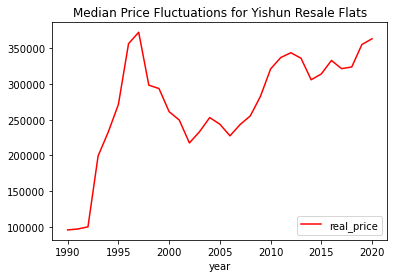

In [8]:
# Create pivot table and trend line

yishun_trend = pd.pivot_table(yishun, index = 'year', values = ['real_price'], aggfunc = np.median).sort_values(by=['year'], ascending=True)
yishun_trend.plot(y = 'real_price', kind ='line', color ='red')
plt.title('Median Price Fluctuations for Yishun Resale Flats')
plt.show()

In [9]:
# Compare Yishun prices with rest of SG

## 2015 to 2022
df['year'] = pd.DatetimeIndex(df['month']).year # extract out year
df1522 = df[df['year'].isin([2015,2016,2017,2018,2019,2020,2021,2022])].groupby(['town'], as_index=False).agg({'real_price': 'median'}).sort_values('real_price', ascending=True).reset_index(drop=True)
df1522['real_price'] = round(df1522['real_price']/1000)
df1522['color'] = ['#f8766d'] + ['#3c78d8']*(len(df1522)-2) + ['#00ba38']

# 4-room
df1522_4room = df[(df['flat_type'].isin(['4 ROOM'])) & (df['year'].isin([2015,2016,2017,2018,2019,2020,2021,2022]))].groupby(['town'], as_index=False).agg({'real_price': 'median'}).sort_values('real_price', ascending=True).reset_index(drop=True)
df1522_4room['real_price'] = round(df1522_4room['real_price']/1000)
df1522_4room['color'] = ['#f8766d','#f8766d'] + ['#3c78d8']*(len(df1522_4room)-3) + ['#00ba38']

In [10]:
# Function for lollipop charts
def loll_plot(df, x, y, subtitle, xlabel, xlim):
    plt.rc('axes', axisbelow=True)
    plt.grid(linestyle='--', alpha=0.4)
    plt.hlines(y=df.index, xmin=0, xmax=df[x], color=df.color, linewidth=1)
    plt.scatter(df[x], df.index, color=df.color, s=300)
    for i, txt in enumerate(df[x]):
        plt.annotate(str(round(txt)), (txt, i), color='white', fontsize=9, ha='center', va='center')
    plt.annotate(subtitle, xy=(1, 0), xycoords='axes fraction', fontsize=20,
                    xytext=(-5, 5), textcoords='offset points',
                    ha='right', va='bottom')
    plt.yticks(df.index, df[y]); plt.xticks(fontsize=12); plt.xlim(xlim)
    plt.xlabel(xlabel, fontsize=14)

<ipython-input-11-a4480f256c7b>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['{:,.0f}'.format(x) + 'K' for x in ax1.get_xticks()])
<ipython-input-11-a4480f256c7b>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['{:,.0f}'.format(x) + 'K' for x in ax2.get_xticks()])


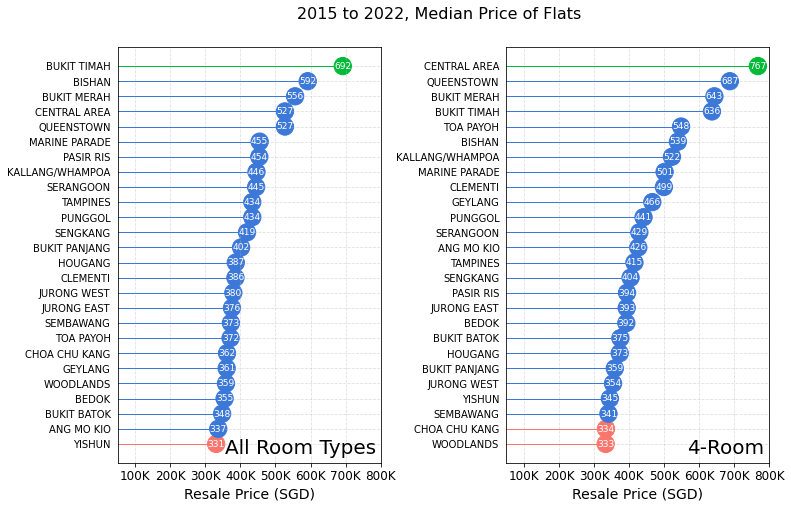

In [11]:
fig = plt.figure(figsize=(12,7))

ax1 = plt.subplot(121)
loll_plot(df1522, 'real_price', 'town', 'All Room Types', 'Resale Price (SGD)', [50,800])
ax1.set_xticklabels(['{:,.0f}'.format(x) + 'K' for x in ax1.get_xticks()])
ax1.yaxis.set_ticks_position('none') 

ax2 = plt.subplot(122)
loll_plot(df1522_4room, 'real_price', 'town', '4-Room', 'Resale Price (SGD)', [50,800])
ax2.set_xticklabels(['{:,.0f}'.format(x) + 'K' for x in ax2.get_xticks()])
ax2.yaxis.set_ticks_position('none') 

fig.tight_layout(pad=0, rect=[0, 0, 0.9, 0.9])
plt.suptitle('2015 to 2022, Median Price of Flats', fontsize=16)
plt.show()

In [32]:
## 2000 vs 2022

# all room type
df0020 = df[df['year'].isin([2000,2020])].groupby(['town','year'], as_index=False).agg({'real_price': 'median'})
df0020['change'] = df0020.groupby('town')['real_price'].apply(lambda x: x.pct_change()*100)
df0020 = df0020[df0020['change'].notnull()] 
df0020 = df0020.sort_values('change', ascending=True).reset_index(drop=True).reset_index()
df0020['color'] = df0020['change'].apply(lambda x: '#00ba38' if x > 0 else '#f8766d')

# 4-room
df0020_4room = df[(df['flat_type'].isin(['4 ROOM']) & df['year'].isin([2000,2020]))].groupby(['town','year'], as_index=False).agg({'real_price': 'median'})
df0020_4room['change'] = df0020_4room.groupby('town')['real_price'].apply(lambda x: x.pct_change()*100)
df0020_4room = df0020_4room[df0020_4room.change.notnull()]
df0020_4room = df0020_4room.sort_values('change', ascending=True).reset_index(drop=True).reset_index()
df0020_4room['color'] = df0020_4room['change'].apply(lambda x: '#00ba38' if x > 0 else '#f8766d')

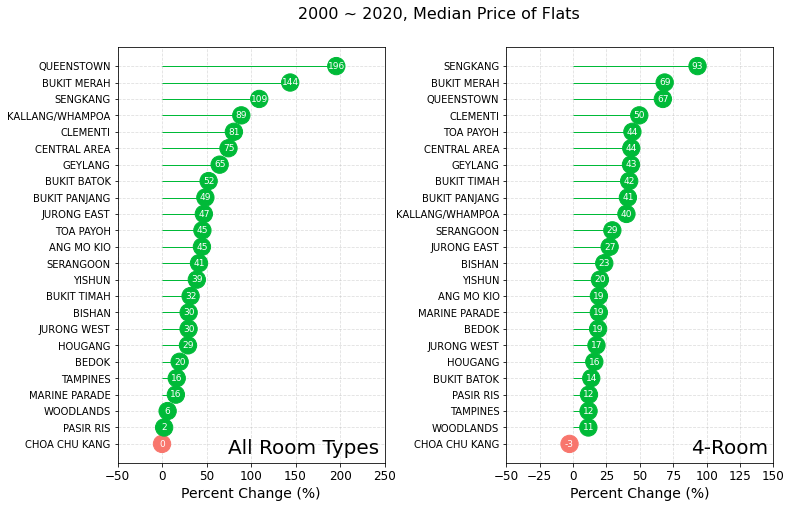

In [39]:
fig = plt.figure(figsize=(12,7))

ax1 = plt.subplot(121)
loll_plot(df0020, 'change', 'town', 'All Room Types', 'Percent Change (%)', [-50,250])

ax2 = plt.subplot(122)
loll_plot(df0020_4room, 'change', 'town', '4-Room', 'Percent Change (%)', [-50,150])

fig.tight_layout(pad=0, rect=[0, 0, 0.9, 0.9])
plt.suptitle('2000 ~ 2020, Median Price of Flats', fontsize=16)
plt.show()

### Flat Sizes Over Time

In [40]:
df['flat_type'].value_counts()

4 ROOM              337409
3 ROOM              287704
5 ROOM              187677
EXECUTIVE            67646
2 ROOM               10901
1 ROOM                1294
MULTI GENERATION       279
MULTI-GENERATION       258
Name: flat_type, dtype: int64

In [41]:
# Pull out transaction data for 3-5rm units

r3 = df.loc[df['flat_type'] == '3 ROOM']
r4 = df.loc[df['flat_type'] == '4 ROOM']
r5 = df.loc[df['flat_type'] == '5 ROOM']
rex = df.loc[df['flat_type'] == 'EXECUTIVE']

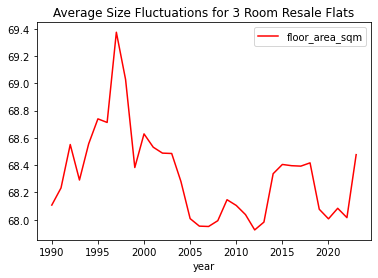

In [43]:
# Create pivot table and trend line

r3_trend = pd.pivot_table(r3, index = 'year', values = ['floor_area_sqm'], aggfunc = np.mean).sort_values(by=['year'], ascending=True)
r3_trend.plot(y = 'floor_area_sqm', kind ='line', color ='red')
plt.title('Average Size Fluctuations for 3 Room Resale Flats')
plt.show()

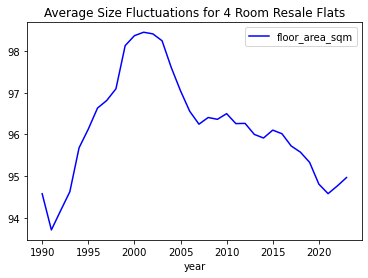

In [44]:
r4_trend = pd.pivot_table(r4, index = 'year', values = ['floor_area_sqm'], aggfunc = np.mean).sort_values(by=['year'], ascending=True)
r4_trend.plot(y = 'floor_area_sqm', kind ='line', color ='blue')
plt.title('Average Size Fluctuations for 4 Room Resale Flats')
plt.show()

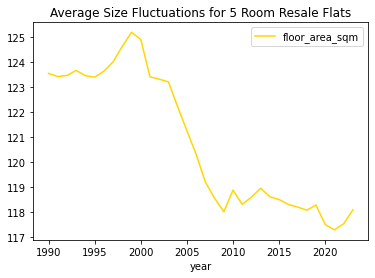

In [45]:
r5_trend = pd.pivot_table(r5, index = 'year', values = ['floor_area_sqm'], aggfunc = np.mean).sort_values(by=['year'], ascending=True)
r5_trend.plot(y = 'floor_area_sqm', kind ='line', color ='gold')
plt.title('Average Size Fluctuations for 5 Room Resale Flats')
plt.show()

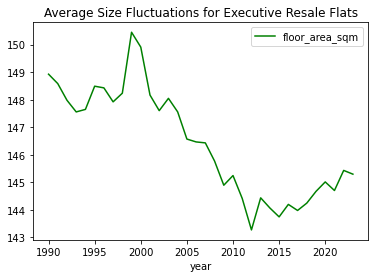

In [48]:
rex_trend = pd.pivot_table(rex, index = 'year', values = ['floor_area_sqm'], aggfunc = np.mean).sort_values(by=['year'], ascending=True)
rex_trend.plot(y = 'floor_area_sqm', kind ='line', color ='green')
plt.title('Average Size Fluctuations for Executive Resale Flats')
plt.show()